#### 2. **Multiple Linear Regression**
- Extension of linear regression with multiple independent variables.
- Equation:  
  $
  Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n + \varepsilon
  $

or 

Y =m1x1 + m2x2 + m3x3 + ... + c   (This is the equation of plan)

Suppose we have 3 column, Age, Experience and Salary and we want to predict salary base on age and experience the we have 2 feature
x1= age and x2 = experience.
we only use multiple linear regression when x1 and x2 both follow the linearity with y (salary) otherwise we'll use feature selection

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
dataset = pd.read_csv('age_experience_salary_dataset.csv')
dataset.head(3)

,Age,Experience,Salary
0,59,12,26759.34
1,49,27,40687.12
2,35,13,31057.20


In [3]:
# checking the shape
dataset.shape

(550, 3)

In [4]:
# checking null if found the fillna
dataset.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

follow the data cleaning process for apply machine learning model,

but in our current dataset this is cleaned.

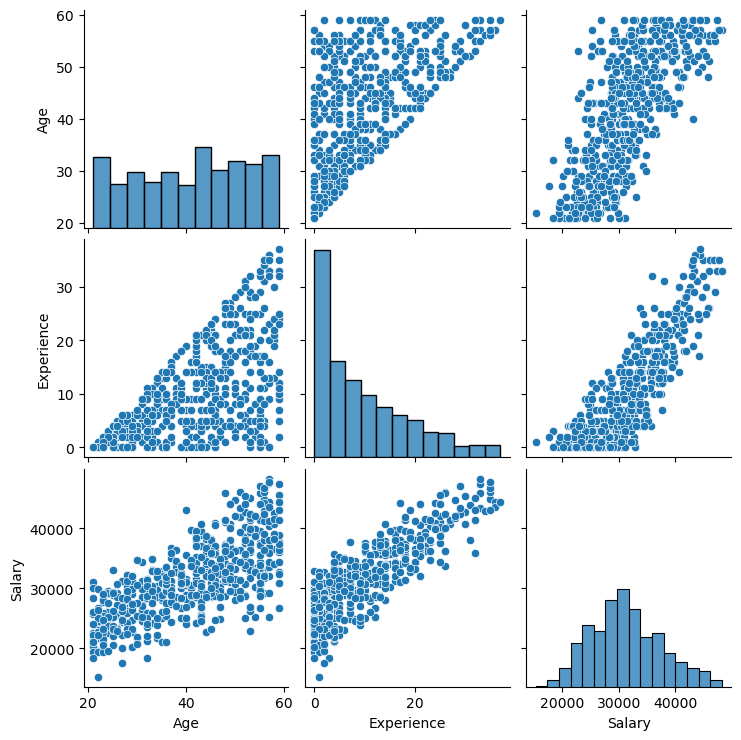

In [6]:
# we have 2 features, so we'll check the linearity of these with Output salary
#using pairplot that plot all the possible scenarios graph

sns.pairplot(data=dataset)
plt.show()

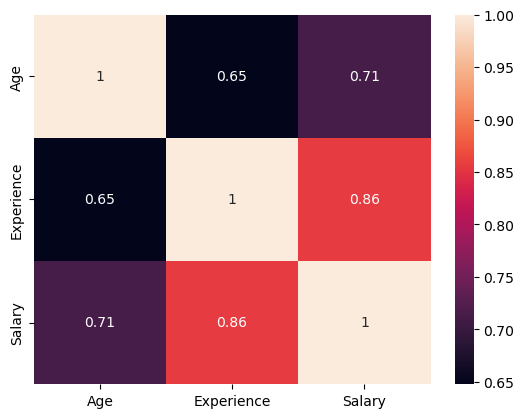

In [ ]:
# if above graph does not show linearity then use correlation using heatmap

sns.heatmap(data=dataset.corr(), annot=True)
plt.show()  

# you could see there is highly correlation between age and salary and experience and salary (value is greater then .5)

In [22]:
# now select the features
x = dataset.iloc[:,:-1]
y = dataset['Salary']

In [50]:
#now split the data in train and test using train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [51]:
# building the model using linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [52]:
lr.fit(x_train, y_train) # this build the algo Y =m1x1 + m2x2 + c

LinearRegression()

In [53]:
#our model is trained now check the accuracy 
lr.score(x_test, y_test)

0.7861765238848918

In [44]:
# now look the m1, m2 and c
lr.coef_, lr.intercept_

(array([152.68812903, 469.39222443]), 20496.095668561906)

In [ ]:
# so 
# m1 = 152.68 and 
# m2 is 469.39 and
# c = 20496.09

# now validate this taking any data from dataset

# using 49	27	40687.12

# Y =m1x1 + m2x2 + c where x1 = 49, x2 = 27, Y = 40687.12 (this what we need to predict)

y = 152.68812903 * 49 + 469.39222443 * 27 + 20496.095668561906
y

40651.40405064191

In [45]:
# now verifying this using our model

lr.predict([[49, 27]]) 

# verified, both values looks identical nearest to 40687.12

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40651.40405042])